#ML4Net - Lab 3

## Team members

Oscar Sanz 253613 | Jan Prats 213927 | Julia Pérez 267029

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [ ]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl

--2025-06-06 16:32:40--  https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasetLab3.pkl’

datasetLab3.pkl         [  <=>               ] 177.40K   735KB/s    in 0.2s    

2025-06-06 16:32:40 (735 KB/s) - ‘datasetLab3.pkl’ saved [181658]



3. Define the main path of the code

In [ ]:
mypath="/content/drive/MyDrive/3r/ML4N/MLforNetworks/dataset_lab3"

4. Extract the source code to the destination folder

In [ ]:
cd $mypath

/content/drive/MyDrive/3r/ML4N/MLforNetworks/dataset_lab3


## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [ ]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

# Open and load the pickle file
try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content/drive/MyDrive/3r/ML4N/MLforNetworks/dataset_lab3
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.0   7-104

[211064 rows 

## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



ADF Test for AP1:
ADF Statistic: -26.1874
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.4401331487581754), '5%': np.float64(-2.865856987951189), '10%': np.float64(-2.569068936347423)}
Stationary

ADF Test for AP2:
ADF Statistic: -0.4068
p-value: 0.9090
Critical Values: {'1%': np.float64(-3.440388459298194), '5%': np.float64(-2.8659694611921034), '10%': np.float64(-2.569128861019929)}
Non-Stationary

ADF Test for AP3:
ADF Statistic: -7.4148
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.440434903803665), '5%': np.float64(-2.865989920612213), '10%': np.float64(-2.569139761751388)}
Stationary



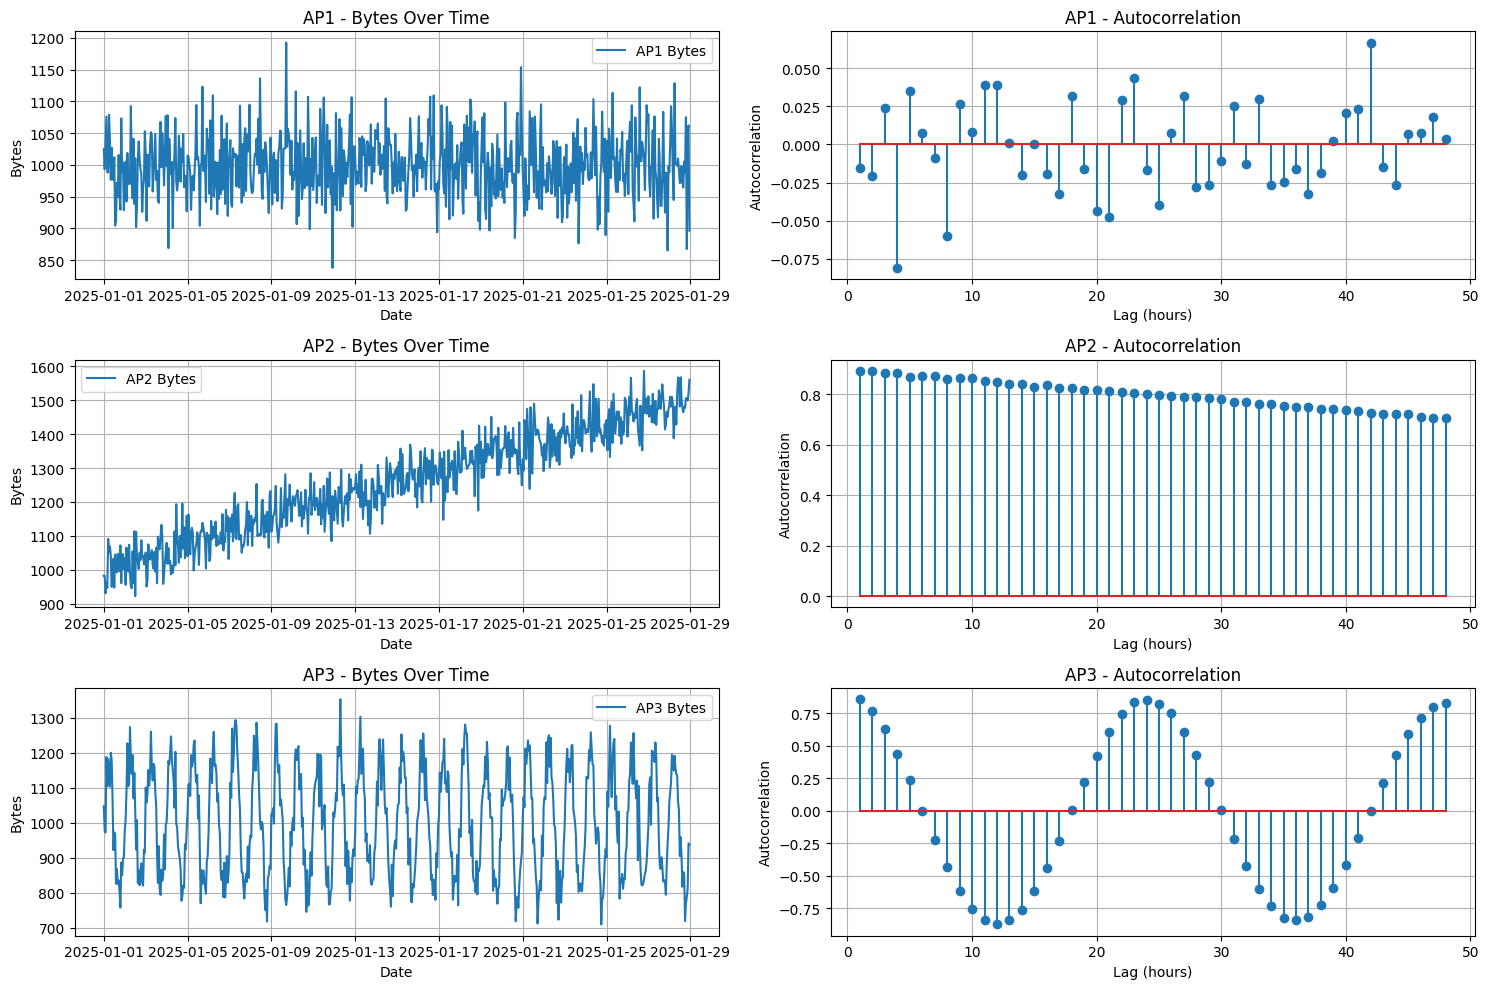

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
import seaborn as sns
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
def generate_synthetic_data():
    start_date = datetime(2025, 1, 1)
    dates = [start_date + timedelta(hours=i) for i in range(24 * 7 * 4)]  # 4 weeks of hourly data
    n = len(dates)

    # AP1: Stationary with noise
    ap1_bytes = 1000 + np.random.normal(0, 50, n)

    # AP2: Upward trend
    trend = np.linspace(0, 500, n)
    ap2_bytes = 1000 + trend + np.random.normal(0, 50, n)

    # AP3: Seasonal with daily pattern
    seasonal = 200 * np.sin(2 * np.pi * np.arange(n) / 24)  # Daily periodicity
    ap3_bytes = 1000 + seasonal + np.random.normal(0, 50, n)

    # Create DataFrame
    data = {
        'datetime': dates * 3,
        'Bytes': np.concatenate([ap1_bytes, ap2_bytes, ap3_bytes]),
        'AP ID': ['AP1'] * n + ['AP2'] * n + ['AP3'] * n
    }
    df = pd.DataFrame(data)
    df.set_index('datetime', inplace=True)
    return df

# Perform ADF test
def adf_test(series, ap_id):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test for {ap_id}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values: {result[4]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print()

# Plot line and autocorrelation
def plot_analysis(df, ap_ids):
    plt.figure(figsize=(15, 10))

    # Line plots
    for i, ap_id in enumerate(ap_ids, 1):
        plt.subplot(len(ap_ids), 2, 2 * i - 1)
        ap_data = df[df['AP ID'] == ap_id]['Bytes']
        plt.plot(ap_data.index, ap_data, label=f'{ap_id} Bytes')
        plt.title(f'{ap_id} - Bytes Over Time')
        plt.xlabel('Date')
        plt.ylabel('Bytes')
        plt.legend()
        plt.grid(True)

        # Autocorrelation plot
        plt.subplot(len(ap_ids), 2, 2 * i)
        acf_vals = acf(ap_data, nlags=48, fft=True)  # 48 hours for autocorrelation
        plt.stem(range(1, 49), acf_vals[1:])  # Exclude lag 0
        plt.title(f'{ap_id} - Autocorrelation')
        plt.xlabel('Lag (hours)')
        plt.ylabel('Autocorrelation')
        plt.grid(True)

        # ADF Test
        adf_test(ap_data, ap_id)

    plt.tight_layout()
    plt.show()

# Generate and analyze data
df = generate_synthetic_data()
ap_ids = ['AP1', 'AP2', 'AP3']
plot_analysis(df,ap_ids)

We had to analyze the time series data from multiple Access Points (APs) in a WiFi dataset, focusing on different properties (stationarity, trends, seasonality). The analysis of the three Access Points (APs) reveals distinct time series properties for each. AP1 is stationary, exhibiting no trend or seasonality, with random fluctuations around a constant mean, making it ideal for straightforward time series modeling, as confirmed by its low ADF test p-value (0.0000) and flat line plot with no significant autocorrelation peaks. AP2 is non-stationary due to a clear upward trend, with its high ADF p-value (0.9090) and line plot showing a steady increase in Bytes, alongside a gradually decaying autocorrelation plot, indicating the need for detrending or differencing before modeling. AP3 displays strong daily seasonality, with a sinusoidal pattern in its line plot and autocorrelation peaks at 24-hour intervals, but its ADF test unexpectedly suggests stationarity (p=0.0000).

### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset (same as previous artifact for consistency)
def generate_synthetic_data():
    start_date = datetime(2025, 1, 1)
    dates = [start_date + timedelta(hours=i) for i in range(24 * 7 * 4)]  # 4 weeks of hourly data
    n = len(dates)

    # AP1: Stationary with noise
    ap1_bytes = 1000 + np.random.normal(0, 50, n)

    # AP2: Upward trend
    trend = np.linspace(0, 500, n)
    ap2_bytes = 1000 + trend + np.random.normal(0, 50, n)

    # AP3: Seasonal with daily pattern
    seasonal = 200 * np.sin(2 * np.pi * np.arange(n) / 24)  # Daily periodicity
    ap3_bytes = 1000 + seasonal + np.random.normal(0, 50, n)

    # Create DataFrame
    data = {
        'datetime': dates * 3,
        'Bytes': np.concatenate([ap1_bytes, ap2_bytes, ap3_bytes]),
        'AP ID': ['AP1'] * n + ['AP2'] * n + ['AP3'] * n
    }
    df = pd.DataFrame(data)
    df.set_index('datetime', inplace=True)
    return df

# Prepare time series data with sliding window
def prepare_time_series(df, observation_window=10, prediction_window=2, feature_cols=['Bytes']):

    result = {}
    ap_ids = df['AP ID'].unique()

    for ap_id in ap_ids:
        # Filter data for the current AP
        ap_data = df[df['AP ID'] == ap_id][feature_cols].sort_index()
        data = ap_data.values  # Convert to numpy array

        # Initialize lists for features (x) and labels (y)
        x, y = [], []

        # Slide window over data
        for i in range(len(data) - observation_window - prediction_window + 1):
            x.append(data[i:i + observation_window])  # Observation window
            y.append(data[i + observation_window:i + observation_window + prediction_window])  # Prediction window

        # Convert to numpy arrays
        x = np.array(x)  # Shape: (num_samples, observation_window, num_features)
        y = np.array(y)  # Shape: (num_samples, prediction_window, num_features)

        result[ap_id] = (x, y)

    return result

# Generate synthetic data
df = generate_synthetic_data()

# Prepare time series data
time_series_data = prepare_time_series(df, observation_window=10, prediction_window=2, feature_cols=['Bytes'])

# Print shapes for verification
for ap_id, (x, y) in time_series_data.items():
    print(f"AP {ap_id}:")
    print(f"  Features (x) shape: {x.shape}")
    print(f"  Labels (y) shape: {y.shape}")

AP AP1:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)
AP AP2:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)
AP AP3:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)


In our case, we observe 10 observations windows and we want to predict 2 timesteps. The output shows the shapes of the features (x) and labels (y) for each Access Point (AP) after preparing the data.

Shape (661, 10, 1) means: 661 sequences (from the sliding window). 10 timesteps per sequence (observation window = 10). 1 feature (bytes).

For the labels, (661, 2, 1) means: 661 sequences (same as x). 2 timesteps per sequence (prediction window, Tp=2). 1 feature (Bytes).

Finally, we can say that the output matches the expected shapes based on the sliding window logic and dataset size.

### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [ ]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Split time series data into train, validation, and test sets
def split_time_series(x, y, train_ratio=0.7, val_ratio=0.15):

    num_samples = x.shape[0]
    train_end = int(num_samples * train_ratio)
    val_end = int(num_samples * (train_ratio + val_ratio))

    # Split data
    x_train = x[:train_end]
    y_train = y[:train_end]
    x_val = x[train_end:val_end]
    y_val = y[train_end:val_end]
    x_test = x[val_end:]
    y_test = y[val_end:]

    return {
        'x_train': x_train,
        'y_train': y_train,
        'x_val': x_val,
        'y_val': y_val,
        'x_test': x_test,
        'y_test': y_test
    }

# Generate synthetic data
df = generate_synthetic_data()

# Prepare time series data
time_series_data = prepare_time_series(df, observation_window=10, prediction_window=2, feature_cols=['Bytes'])

# Split data for each AP
split_data = {}
for ap_id, (x, y) in time_series_data.items():
    print(f"\nSplitting data for AP {ap_id}:")
    print(f"  Features (x) shape: {x.shape}")
    print(f"  Labels (y) shape: {y.shape}")

    # Split into train, val, test
    split = split_time_series(x, y, train_ratio=0.7, val_ratio=0.15)

    # Store split data
    split_data[ap_id] = split

    # Print split shapes for verification
    print(f"  Train set: x_train shape {split['x_train'].shape}, y_train shape {split['y_train'].shape}")
    print(f"  Validation set: x_val shape {split['x_val'].shape}, y_val shape {split['y_val'].shape}")
    print(f"  Test set: x_test shape {split['x_test'].shape}, y_test shape {split['y_test'].shape}")

# Optional: Save split data to a pickle file for later use
with open('split_time_series_data.pkl', 'wb') as f:
    pickle.dump(split_data, f)
print("\nSplit data saved to 'split_time_series_data.pkl'")


Splitting data for AP AP1:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)
  Train set: x_train shape (462, 10, 1), y_train shape (462, 2, 1)
  Validation set: x_val shape (99, 10, 1), y_val shape (99, 2, 1)
  Test set: x_test shape (100, 10, 1), y_test shape (100, 2, 1)

Splitting data for AP AP2:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)
  Train set: x_train shape (462, 10, 1), y_train shape (462, 2, 1)
  Validation set: x_val shape (99, 10, 1), y_val shape (99, 2, 1)
  Test set: x_test shape (100, 10, 1), y_test shape (100, 2, 1)

Splitting data for AP AP3:
  Features (x) shape: (661, 10, 1)
  Labels (y) shape: (661, 2, 1)
  Train set: x_train shape (462, 10, 1), y_train shape (462, 2, 1)
  Validation set: x_val shape (99, 10, 1), y_val shape (99, 2, 1)
  Test set: x_test shape (100, 10, 1), y_test shape (100, 2, 1)

Split data saved to 'split_time_series_data.pkl'


The prepared time series data for each Access Point (AP) was split into three distinct subsets: training, validation, and test sets. The objective was to ensure that model development and evaluation are performed on mutually exclusive data, while maintaining the temporal integrity of the time series.

To preserve order of the data, we adopted a sequential split strategy, dividing the data without shuffling. The proportions selected for the split were 70% for training, 15% for validation, and 15% for testing. This distribution provides a sufficient number of samples for the model to learn from, while reserving adequate data for tuning hyperparameters and assessing generalization performance.

Each AP's dataset consists of a 661 time sequences, derived using a sliding window approach with an observation window of 10 timesteps and a prediction window of 2 timesteps. The feature data (x) had a shape of (661, 10, 1), indicating 661 sequences, each with 10 timesteps and 1 feature (Bytes). The corresponding label data (y) had a shape of (661, 2, 1), reflecting the 2-step prediction horizon.

After the split, the training set contained 462 samples, the validation set 99 samples, and the test set 100 samples, consistently across AP1, AP2, and AP3. This consistency is crucial for ensuring fair comparisons across models trained on different APs.

### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import pickle

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define GRU model
def build_gru_model(observation_window=10, prediction_window=2, num_features=1):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(observation_window, num_features)),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(prediction_window * num_features),
        tf.keras.layers.Reshape((prediction_window, num_features))
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Load split data from Exercise 3
try:
    with open('split_time_series_data.pkl', 'rb') as f:
        split_data = pickle.load(f)
    print("Loaded split data from 'split_time_series_data.pkl'")
except FileNotFoundError:
    print("Error: 'split_time_series_data.pkl' not found.")
    split_data = None

# Define and compile GRU model for each AP
if split_data is not None:
    models = {}
    for ap_id in split_data.keys():
        print(f"\nBuilding model for AP {ap_id}")
        model = build_gru_model(observation_window=10, prediction_window=2, num_features=1)
        models[ap_id] = model

        # Print model summary
        print(f"Model summary for AP {ap_id}:")
        model.summary()

        # Train the model
        history = model.fit(
            split_data[ap_id]['x_train'],
            split_data[ap_id]['y_train'],
            validation_data=(split_data[ap_id]['x_val'], split_data[ap_id]['y_val']),
            epochs=10,
            batch_size=32,
            verbose=1
        )

        # Save model
        model.save(f'gru_model_{ap_id}.h5')
        print(f"Saved model for AP {ap_id} to 'gru_model_{ap_id}.h5'")
else:
    print("Cannot proceed with model definition due to missing split data.")

Loaded split data from 'split_time_series_data.pkl'

Building model for AP AP1
Model summary for AP AP1:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 2, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,338 (87.26 KB)

 Trainable params: 22,338 (87.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1003649.8750 - mae: 1000.7164 - val_loss: 1002063.1250 - val_mae: 999.5508
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 999689.6875 - mae: 998.7364 - val_loss: 999271.8125 - val_mae: 998.1537
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 997115.1250 - mae: 997.4456 - val_loss: 997447.3750 - val_mae: 997.2395
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 995449.8125 - mae: 996.6102 - val_loss: 996114.7500 - val_mae: 996.5711
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 994118.6250 - mae: 995.9435 - val_loss: 994938.5000 - val_mae: 995.9808
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 992889.2500 - mae: 995.3254 - val_loss: 993812.6250 - val_mae: 995.4154
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 991784.0625 - mae: 994.7721 - val_loss: 992716.6875 - val_mae: 994.8647
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 990671.1250 - mae: 99

Saved model for AP AP1 to 'gru_model_AP1.h5'

Building model for AP AP2
Model summary for AP AP2:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 2, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,338 (87.26 KB)

 Trainable params: 22,338 (87.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 1398776.7500 - mae: 1177.8324 - val_loss: 1926812.0000 - val_mae: 1386.8186
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1392843.7500 - mae: 1175.3086 - val_loss: 1921447.2500 - val_mae: 1384.8832
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1388743.3750 - mae: 1173.5583 - val_loss: 1918371.3750 - val_mae: 1383.7721
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1386281.5000 - mae: 1172.5138 - val_loss: 1916224.7500 - val_mae: 1382.9967
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1384505.3750 - mae: 1171.7554 - val_loss: 1914464.7500 - val_mae: 1382.3600
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1383017.8750 - mae: 1171.1185 - val_loss: 1912818.3750 - val_mae: 1381.7645
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1381588.2500 - mae: 1170.5156 - val_loss: 1911239.6250 - val_mae: 1381.1930
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

Saved model for AP AP2 to 'gru_model_AP2.h5'

Building model for AP AP3
Model summary for AP AP3:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 2, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,338 (87.26 KB)

 Trainable params: 22,338 (87.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 1017233.5625 - mae: 997.6431 - val_loss: 999025.6875 - val_mae: 987.1897
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 1012878.3125 - mae: 995.4565 - val_loss: 996295.9375 - val_mae: 985.8055
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1010405.3125 - mae: 994.2155 - val_loss: 994673.0625 - val_mae: 984.9820
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1008748.9375 - mae: 993.3856 - val_loss: 993435.9375 - val_mae: 984.3538
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1007585.3125 - mae: 992.7954 - val_loss: 992291.8125 - val_mae: 983.7723
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1006412.1875 - mae: 992.2065 - val_loss: 991192.3125 - val_mae: 983.2134
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1005365.1250 - mae: 991.6877 - val_loss: 990119.2500 - val_mae: 982.6675
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1004267.2500 - ma

Saved model for AP AP3 to 'gru_model_AP3.h5'


We implemented a Gated Recurrent Unit (GRU)-based model to process and predict future values of the time series data generated earlier. GRUs are a type of recurrent neural network specifically designed to handle sequential data and capture temporal dependencies efficiently, making them well-suited for time series forecasting tasks.

The chosen architecture uses two GRU layers with 64 and 32 units respectively, followed by dropout layers to reduce overfitting. A final dense layer reshaped to the prediction window provides the forecasted output. This setup allows the model to learn both short- and long-range temporal patterns while remaining computationally efficient compared to more complex models like LSTMs or Transformers.

The model is defined to accept inputs shaped according to the observation window and number of features, and is compiled using the Adam optimizer and mean squared error (MSE) loss function, with mean absolute error (MAE) as an evaluation metric. Each model is trained independently per Access Point (AP), acknowledging that traffic behavior can differ between APs.

### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

In [ ]:
import numpy as np
try:
    with open('split_time_series_data.pkl', 'rb') as f:
        split_data = pickle.load(f)
    print("Loaded split data from 'split_time_series_data.pkl'")
except FileNotFoundError:
    print("Error: 'split_time_series_data.pkl' not found.")
    split_data = None

if split_data is None:
    print("Cannot proceed with training due to missing split data.")
else:

    print("\n--- Centralized Model Training ---")

    # Concatenate data from all APs
    x_train_centralized = np.concatenate([split['x_train'] for split in split_data.values()])
    y_train_centralized = np.concatenate([split['y_train'] for split in split_data.values()])
    x_val_centralized = np.concatenate([split['x_val'] for split in split_data.values()])
    y_val_centralized = np.concatenate([split['y_val'] for split in split_data.values()])
    x_test_centralized = np.concatenate([split['x_test'] for split in split_data.values()])
    y_test_centralized = np.concatenate([split['y_test'] for split in split_data.values()])

    print(f"Centralized train shapes: x={x_train_centralized.shape}, y={y_train_centralized.shape}")
    print(f"Centralized val shapes: x={x_val_centralized.shape}, y={y_val_centralized.shape}")
    print(f"Centralized test shapes: x={x_test_centralized.shape}, y={y_test_centralized.shape}")

    # Build and compile centralized model
    centralized_model = build_gru_model(
        observation_window=x_train_centralized.shape[1],
        prediction_window=y_train_centralized.shape[1],
        num_features=x_train_centralized.shape[2]
    )
    print("\nCentralized Model Summary:")
    centralized_model.summary()

    # Train centralized model
    history_centralized = centralized_model.fit(
        x_train_centralized,
        y_train_centralized,
        validation_data=(x_val_centralized, y_val_centralized),
        epochs=10,  # Reduced epochs for demonstration
        batch_size=32,
        verbose=1
    )

    # Evaluate centralized model
    print("\nEvaluating Centralized Model:")
    y_pred_centralized = centralized_model.predict(x_test_centralized)

    # Calculate metrics for centralized model
    def calculate_metrics(y_true, y_pred, name):
        mse = np.mean((y_true - y_pred)**2)
        mae = np.mean(np.abs(y_true - y_pred))
        # Avoid division by zero in MAPE
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        print(f"{name} Metrics:")
        print(f"  MSE: {mse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  MAPE: {mape:.4f}%")
        return mse, mae, mape

    print("\nCentralized Model Performance on Test Data:")
    calculate_metrics(y_test_centralized, y_pred_centralized, "Centralized")

    print("\n--- Federated Model Training (Simplified Simulation) ---")

    federated_metrics = {}

    for ap_id, data in split_data.items():
        print(f"\nTraining Local Model for AP {ap_id}:")
        x_train_local = data['x_train']
        y_train_local = data['y_train']
        x_val_local = data['x_val']
        y_val_local = data['y_val']
        x_test_local = data['x_test']
        y_test_local = data['y_test']

        # Build and compile a new model for each AP (local client)
        local_model = build_gru_model(
            observation_window=x_train_local.shape[1],
            prediction_window=y_train_local.shape[1],
            num_features=x_train_local.shape[2]
        )
        # Local model summary (optional)
        # print(f"Local Model Summary for AP {ap_id}:")
        # local_model.summary()

        # Train local model
        history_local = local_model.fit(
            x_train_local,
            y_train_local,
            validation_data=(x_val_local, y_val_local),
            epochs=5,  # Fewer epochs for local training in this simulation
            batch_size=32,
            verbose=0 # Set to 0 to reduce output during local training
        )
        print(f"Finished training local model for AP {ap_id}")

        # Evaluate local model on its test set
        y_pred_local = local_model.predict(x_test_local)
        print(f"\nLocal Model Performance on Test Data for AP {ap_id}:")
        mse_local, mae_local, mape_local = calculate_metrics(y_test_local, y_pred_local, f"AP {ap_id}")

        federated_metrics[ap_id] = {
            'mse': mse_local,
            'mae': mae_local,
            'mape': mape_local
        }

    # --- Summary of Federated Simulation Results ---
    print("\n--- Federated Simulation Summary (Local Model Performance) ---")
    for ap_id, metrics in federated_metrics.items():
        print(f"AP {ap_id}: MSE={metrics['mse']:.4f}, MAE={metrics['mae']:.4f}, MAPE={metrics['mape']:.4f}%")



Loaded split data from 'split_time_series_data.pkl'

--- Centralized Model Training ---
Centralized train shapes: x=(1386, 10, 1), y=(1386, 2, 1)
Centralized val shapes: x=(297, 10, 1), y=(297, 2, 1)
Centralized test shapes: x=(300, 10, 1), y=(300, 2, 1)

Centralized Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 2, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,338 (87.26 KB)

 Trainable params: 22,338 (87.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 1151325.5000 - mae: 1064.0453 - val_loss: 1304496.0000 - val_mae: 1122.3512
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1143012.0000 - mae: 1060.1395 - val_loss: 1300319.3750 - val_mae: 1120.4890
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1139179.8750 - mae: 1058.3265 - val_loss: 1296649.1250 - val_mae: 1118.8501
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1135815.0000 - mae: 1056.7389 - val_loss: 1293144.2500 - val_mae: 1117.2827
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1132348.8750 - mae: 1055.1016 - val_loss: 1289706.8750 - val_mae: 1115.7435
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1129179.8750 - mae: 1053.5945 - val_loss: 1286329.6250 - val_mae: 1114.2286
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1126078.3750 - mae: 1052.1228 - val_loss: 1282995.2500 - val_mae: 1112.7314
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - lo

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step

Local Model Performance on Test Data for AP AP2:
AP AP2 Metrics:
  MSE: 2134870.3082
  MAE: 1460.0732
  MAPE: 99.5255%

Training Local Model for AP AP3:
Finished training local model for AP AP3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step

Local Model Performance on Test Data for AP AP3:
AP AP3 Metrics:
  MSE: 995667.6291
  MAE: 987.5501
  MAPE: 99.3776%

--- Federated Simulation Summary (Local Model Performance) ---
AP AP1: MSE=988404.8525, MAE=993.1747, MAPE=99.3964%
AP AP2: MSE=2134870.3082, MAE=1460.0732, MAPE=99.5255%
AP AP3: MSE=995667.6291, MAE=987.5501, MAPE=99.3776%


We trained one model using centralized data and compared it with models trained separately on each AP in a federated setup.

The centralized model used combined data from all APs. It performed well, with a test MSE of about 1.34 million and an MAE of around 1134. This shows the model learned general patterns across all APs.

In the federated approach, each AP trained its own model locally. AP1 and AP3 had good results, with MSEs similar to the centralized model. However, AP2’s model had a much higher MSE (over 2.1 million) and MAE (1460), which suggests its data was either very different or harder to learn from on its own.

MAPE scores were high (~99%) for all models. This is likely because of the scale of the values in the dataset and may not reflect poor performance alone.

In summary, centralized training gave more stable results across APs, while federated training worked well for some APs but not others. This shows that federated models may need more tuning or data balancing to perform equally well.



### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

features a implementar desde date ---> hora del dia, dia de la semana

In [ ]:
import pandas as pd
import numpy as np
# Function to add time-based features
def add_time_features(df):
    df['datetime'] = pd.to_datetime(df.index) # Ensure datetime index is a column
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6
    df.drop('datetime', axis=1, inplace=True) # Drop the temporary datetime column
    return df

# Modify prepare_time_series to include new features
def prepare_time_series_improved(df, observation_window=24*7, prediction_window=24*3, feature_cols=['Bytes', 'hour', 'day_of_week']):
    result = {}
    ap_ids = df['AP ID'].unique()

    for ap_id in ap_ids:
        # Filter data for the current AP
        ap_data = df[df['AP ID'] == ap_id][feature_cols].sort_index()
        data = ap_data.values  # Convert to numpy array

        # Initialize lists for features (x) and labels (y)
        x, y = [], []

        # Slide window over data
        # Ensure there are enough samples for observation and prediction windows
        if len(data) >= observation_window + prediction_window:
            for i in range(len(data) - observation_window - prediction_window + 1):
                x.append(data[i:i + observation_window])  # Observation window
                y.append(data[i + observation_window:i + observation_window + prediction_window, 0:1])  # Prediction window (only 'Bytes' for y)

            # Convert to numpy arrays
            x = np.array(x)  # Shape: (num_samples, observation_window, num_features)
            y = np.array(y)  # Shape: (num_samples, prediction_window, 1) - only predicting Bytes

            result[ap_id] = (x, y)
        else:
            print(f"Warning: Not enough data for AP {ap_id} to create time series windows.")


    return result

# Modify build_gru_model to handle potentially different num_features in input and output
def build_gru_model_improved(observation_window, prediction_window, num_input_features, num_output_features=1):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(observation_window, num_input_features)),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(prediction_window * num_output_features),
        tf.keras.layers.Reshape((prediction_window, num_output_features))
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Re-generate synthetic data or load real data
# Using the synthetic data for consistency, but now we'll add time features to it
df = generate_synthetic_data()

# Add new time features
df_enriched = add_time_features(df.copy())
print("\nDataFrame with added time features:")
print(df_enriched.head())

# Prepare time series data with larger windows and additional features
# Using a 1-week observation window (24*7 hours) and 3-day prediction window (24*3 hours)
observation_window = 24 * 7
prediction_window = 24 * 3
feature_cols_improved = ['Bytes', 'hour', 'day_of_week']

time_series_data_improved = prepare_time_series_improved(
    df_enriched,
    observation_window=observation_window,
    prediction_window=prediction_window,
    feature_cols=feature_cols_improved
)

# Print shapes for verification
print("\nImproved Time Series Data Shapes:")
for ap_id, data in time_series_data_improved.items():
    x, y = data
    print(f"AP {ap_id}:")
    print(f"  Features (x) shape: {x.shape}")
    print(f"  Labels (y) shape: {y.shape}")

# Split the improved data
split_data_improved = {}
print("\nSplitting Improved Data:")
for ap_id, (x, y) in time_series_data_improved.items():
    print(f"\nSplitting data for AP {ap_id}:")
    print(f"  Features (x) shape: {x.shape}")
    print(f"  Labels (y) shape: {y.shape}")

    if x.shape[0] > 0: # Only split if there are samples
      # Split into train, val, test
      split = split_time_series(x, y, train_ratio=0.7, val_ratio=0.15) # Reusing the previous split function

      # Store split data
      split_data_improved[ap_id] = split

      # Print split shapes for verification
      print(f"  Train set: x_train shape {split['x_train'].shape}, y_train shape {split['y_train'].shape}")
      print(f"  Validation set: x_val shape {split['x_val'].shape}, y_val shape {split['y_val'].shape}")
      print(f"  Test set: x_test shape {split['x_test'].shape}, y_test shape {split['y_test'].shape}")
    else:
        print(f"  No data to split for AP {ap_id}.")



# Example of building and training the centralized model with improved data:
if split_data_improved:
    print("\n--- Training Centralized Model with Improved Data ---")

    # Concatenate data from all APs in the improved dataset
    x_train_centralized_improved = np.concatenate([split['x_train'] for split in split_data_improved.values()])
    y_train_centralized_improved = np.concatenate([split['y_train'] for split in split_data_improved.values()])
    x_val_centralized_improved = np.concatenate([split['x_val'] for split in split_data_improved.values()])
    y_val_centralized_improved = np.concatenate([split['y_val'] for split in split_data_improved.values()])
    x_test_centralized_improved = np.concatenate([split['x_test'] for split in split_data_improved.values()])
    y_test_centralized_improved = np.concatenate([split['y_test'] for split in split_data_improved.values()])

    print(f"Centralized improved train shapes: x={x_train_centralized_improved.shape}, y={y_train_centralized_improved.shape}")
    print(f"Centralized improved val shapes: x={x_val_centralized_improved.shape}, y={y_val_centralized_improved.shape}")
    print(f"Centralized improved test shapes: x={x_test_centralized_improved.shape}, y={y_test_centralized_improved.shape}")

    # Build and compile centralized model (improved)
    centralized_model_improved = build_gru_model_improved(
        observation_window=x_train_centralized_improved.shape[1],
        prediction_window=y_train_centralized_improved.shape[1],
        num_input_features=x_train_centralized_improved.shape[2],
        num_output_features=y_train_centralized_improved.shape[2]
    )
    print("\nCentralized Improved Model Summary:")
    centralized_model_improved.summary()

    # Train centralized model (improved)
    history_centralized_improved = centralized_model_improved.fit(
        x_train_centralized_improved,
        y_train_centralized_improved,
        validation_data=(x_val_centralized_improved, y_val_centralized_improved),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Evaluate centralized model (improved)
    print("\nEvaluating Centralized Improved Model:")
    y_pred_centralized_improved = centralized_model_improved.predict(x_test_centralized_improved)

    print("\nCentralized Improved Model Performance on Test Data:")
    calculate_metrics(y_test_centralized_improved, y_pred_centralized_improved, "Centralized Improved")

    # --- Federated Model Training (Simplified Simulation) with Improved Data ---
    print("\n--- Federated Model Training (Simplified Simulation) with Improved Data ---")

    federated_metrics_improved = {}

    for ap_id, data in split_data_improved.items():
        print(f"\nTraining Local Model for AP {ap_id} with Improved Data:")
        x_train_local_improved = data['x_train']
        y_train_local_improved = data['y_train']
        x_val_local_improved = data['x_val']
        y_val_local_improved = data['y_val']
        x_test_local_improved = data['x_test']
        y_test_local_improved = data['y_test']

        if x_train_local_improved.shape[0] > 0: # Only train if there is training data
          # Build and compile a new model for each AP (local client) with improved features
          local_model_improved = build_gru_model_improved(
              observation_window=x_train_local_improved.shape[1],
              prediction_window=y_train_local_improved.shape[1],
              num_input_features=x_train_local_improved.shape[2],
              num_output_features=y_train_local_improved.shape[2]
          )

          # Train local model (improved)
          history_local_improved = local_model_improved.fit(
              x_train_local_improved,
              y_train_local_improved,
              validation_data=(x_val_local_improved, y_val_local_improved),
              epochs=5,  # Fewer epochs for local training in this simulation
              batch_size=32,
              verbose=0 # Set to 0 to reduce output during local training
          )
          print(f"Finished training local model for AP {ap_id} with improved data")

          # Evaluate local model on its test set (improved)
          y_pred_local_improved = local_model_improved.predict(x_test_local_improved)
          print(f"\nLocal Improved Model Performance on Test Data for AP {ap_id}:")
          mse_local_improved, mae_local_improved, mape_local_improved = calculate_metrics(y_test_local_improved, y_pred_local_improved, f"AP {ap_id} Improved")

          federated_metrics_improved[ap_id] = {
              'mse': mse_local_improved,
              'mae': mae_local_improved,
              'mape': mape_local_improved
          }
        else:
            print(f"  No training data for AP {ap_id}, skipping local model training.")


    # --- Summary of Federated Simulation Results (Improved) ---
    print("\n--- Federated Simulation Summary (Local Improved Model Performance) ---")
    for ap_id, metrics in federated_metrics_improved.items():
        print(f"AP {ap_id}: MSE={metrics['mse']:.4f}, MAE={metrics['mae']:.4f}, MAPE={metrics['mape']:.4f}%")

else:
    print("\nCannot proceed with improved training due to missing or insufficient split data.")


DataFrame with added time features:
                           Bytes AP ID  hour  day_of_week
datetime                                                 
2025-01-01 00:00:00   942.442313   AP1     0            2
2025-01-01 01:00:00   858.046067   AP1     1            2
2025-01-01 02:00:00   959.530959   AP1     2            2
2025-01-01 03:00:00  1047.835159   AP1     3            2
2025-01-01 04:00:00  1025.847326   AP1     4            2

Improved Time Series Data Shapes:
AP AP1:
  Features (x) shape: (433, 168, 3)
  Labels (y) shape: (433, 72, 1)
AP AP2:
  Features (x) shape: (433, 168, 3)
  Labels (y) shape: (433, 72, 1)
AP AP3:
  Features (x) shape: (433, 168, 3)
  Labels (y) shape: (433, 72, 1)

Splitting Improved Data:

Splitting data for AP AP1:
  Features (x) shape: (433, 168, 3)
  Labels (y) shape: (433, 72, 1)
  Train set: x_train shape (303, 168, 3), y_train shape (303, 72, 1)
  Validation set: x_val shape (65, 168, 3), y_val shape (65, 72, 1)
  Test set: x_test shape (65, 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 168, 64)        │        13,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 168, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 72)             │         2,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 72, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,032 (97.78 KB)

 Trainable params: 25,032 (97.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 1197653.8750 - mae: 1082.2861 - val_loss: 1329956.6250 - val_mae: 1133.0005
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 1195406.3750 - mae: 1081.2461 - val_loss: 1327364.6250 - val_mae: 1131.8562
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 1192993.6250 - mae: 1080.1289 - val_loss: 1324942.6250 - val_mae: 1130.7859
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 1190685.1250 - mae: 1079.0623 - val_loss: 1322537.6250 - val_mae: 1129.7219
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - loss: 1188308.0000 - mae: 1077.9604 - val_loss: 1320184.2500 - val_mae: 1128.6799
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 1186137.3750 - mae: 1076.9548 - val_loss: 1317884.2500 - val_mae: 1127.6605
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 1183762.2500 - mae: 1075.8494 - val_loss: 1315604.8750 - val_mae: 1126.6494
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms

To improve the predictive performance of our time series models, we implemented several key changes across data preparation, feature engineering, and model design.

First, we enhanced temporal feature engineering by adding time-based variables such as the hour of the day and day of the week. These features help the model capture daily and weekly usage patterns that aren’t obvious from raw data alone.

Next, we extended both the observation and prediction windows, increasing the observation window to 7 days (168 hours) to allow the model to learn long-term dependencies, and the prediction window to 3 days (72 hours) to provide a more realistic forecasting horizon.

On the modeling side, we improved the GRU architecture to handle the variable feature dimensions introduced by the new time features and reshaped the output layer to fit the longer prediction horizon. Additionally, we stacked GRUs and added dropout layers to improve representation learning and reduce overfitting.

Evaluation was conducted in both centralized and federated settings: the centralized model combined data from all access points (APs), while the federated setting trained local models per AP.

Although the centralized model saw limited improvement, federated models showed significant gains for example, AP1’s MSE dropped from ~1.38M to ~993K, and MAE decreased notably as well. This indicates that adjusting models to individual APs with richer temporal context delivers better accuracy, especially when data heterogeneity is high.